In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout,Conv3D, MaxPooling3D,Activation
from keras.layers.convolutional import Convolution3D, MaxPooling3D
import os
from keras.models import model_from_json
import json
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
img_row = 100
img_col = 100
img_depth = 16
newDimension = (img_row,img_col)

In [3]:
X_tr = []
a = 0
listing = os.listdir('videofortraining/jump/')
for vid in listing:
    vid = 'videofortraining/jump/'+vid
    frames = []
    newDimension = (img_row,img_col)
    cap = cv2.VideoCapture(vid)

    ret,first_frame = cap.read()
    first_frame = cv2.resize(first_frame, newDimension, interpolation = cv2.INTER_AREA)
    prev_gray = cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(first_frame)
    hsv[...,1] = 255

    frameRate = cap.get(7)/(img_depth)
    #print(frameRate)
    newDimension = (img_row,img_col)
    a = a + frameRate
    frame_list = []

    for i in range(img_depth):
        f = math.floor((i + 1) * frameRate)
        frame_list.append(f)
    frame_list.append(int(cap.get(7)-2))

    while (cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId in frame_list:
            frame = cv2.resize(frame, newDimension, interpolation = cv2.INTER_AREA)
            gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag,ang = cv2.cartToPolar(flow[...,0],flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            flow = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
            flow = cv2.cvtColor(flow,cv2.COLOR_BGR2GRAY)
            frames.append(flow)
            prev_gray = gray
        
    cap.release()
    cv2.destroyAllWindows()

    input=np.array(frames)

    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    print(ipt.shape)
    X_tr.append(ipt)

(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100,

In [4]:
listing = os.listdir('videofortraining/walk/')
for vid in listing:
    vid = 'videofortraining/walk/'+vid
    frames = []
    newDimension = (img_row,img_col)
    cap = cv2.VideoCapture(vid)

    ret,first_frame = cap.read()
    first_frame = cv2.resize(first_frame, newDimension, interpolation = cv2.INTER_AREA)
    prev_gray = cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(first_frame)
    hsv[...,1] = 255

    frameRate = cap.get(7)/(img_depth)
    #print(frameRate)
    newDimension = (img_row,img_col)
    a = a + frameRate
    frame_list = []

    for i in range(img_depth):
        f = math.floor((i + 1) * frameRate)
        frame_list.append(f)
    frame_list.append(int(cap.get(7)-2))

    while (cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId in frame_list:
            frame = cv2.resize(frame, newDimension, interpolation = cv2.INTER_AREA)
            gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag,ang = cv2.cartToPolar(flow[...,0],flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            flow = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
            flow = cv2.cvtColor(flow,cv2.COLOR_BGR2GRAY)
            frames.append(flow)
            prev_gray = gray
        
    cap.release()
    cv2.destroyAllWindows()

    input=np.array(frames)

    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    print(ipt.shape)
    X_tr.append(ipt)

(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100, 16)
(100, 100,

In [5]:
X_tr = np.array(X_tr)
print(X_tr.shape)

(293, 100, 100, 16)


In [6]:
num_sample = len(X_tr)

label = np.ones((num_sample))
label[0:125] = 0
label[125:293] = 1
#print(label)

train_data = [X_tr,label]

(X_train,Y_train) = (train_data[0],train_data[1])
print(X_train.shape)
train_set = np.zeros((num_sample,img_row,img_col,img_depth,1))
print(train_set[0,:,:,:,0].shape)
for sample in range(num_sample):
    train_set[sample,:,:,:,0] = X_train[sample][:][:][:]

patch_size = 10
batch_size = 1
num_class = 2
num_epoch = 16

Y_train = np_utils.to_categorical(Y_train,num_class)
#print(Y_train)

num_filter = [32,32,32,32,32]
num_pooling = [3,3]
num_conv = [5,5]

train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)

(293, 100, 100, 16)
(100, 100, 16)


In [7]:
model = Sequential()
model.add(Convolution3D(data_format = 'channels_last',filters = num_filter[0],kernel_size = (3,3,3),input_shape = (img_row,img_col,img_depth,1),activation='relu'))
model.add(MaxPooling3D(pool_size = (2,2,1)))
model.add(Convolution3D(data_format = 'channels_last',filters = num_filter[1],kernel_size = (3,3,3),input_shape = (img_row,img_col,img_depth,1),activation='relu'))
model.add(MaxPooling3D(pool_size = (2,2,1)))
model.add(Convolution3D(data_format = 'channels_last',filters = num_filter[2],kernel_size = (3,3,3),input_shape = (img_row,img_col,img_depth,1),activation='relu'))
model.add(MaxPooling3D(pool_size = (2,2,2)))
model.add(Convolution3D(data_format = 'channels_last',filters = num_filter[0],kernel_size = (3,3,3),input_shape = (img_row,img_col,img_depth,1),activation='relu'))
model.add(MaxPooling3D(pool_size = (2,2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,init = 'normal',activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128,init = 'normal',activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2,init = 'normal'))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'RMSprop',metrics = ['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 98, 98, 14, 32)    896       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 49, 49, 14, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 47, 47, 12, 32)    27680     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 23, 23, 12, 32)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 21, 21, 10, 32)    27680     
_________________________________________________________________
max_pooling

/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="normal")`
  del sys.path[0]
/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
  from ipykernel import kernelapp as app
/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`


In [8]:
X_train_new,X_val_new,Y_train_new,Y_val_new = train_test_split(train_set,Y_train,test_size = 0.2)

In [9]:
hist = model.fit(X_train_new,Y_train_new,validation_data = (X_val_new,Y_val_new),batch_size = batch_size,nb_epoch = num_epoch,shuffle = True)

/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Train on 234 samples, validate on 59 samples
Epoch 1/16
234/234 [==============================] - 132s 565ms/step - loss: 0.7026 - accuracy: 0.5321 - val_loss: 0.6891 - val_accuracy: 0.5763
Epoch 2/16
234/234 [==============================] - 130s 556ms/step - loss: 0.7179 - accuracy: 0.5705 - val_loss: 0.7503 - val_accuracy: 0.5763
Epoch 3/16
234/234 [==============================] - 130s 558ms/step - loss: 0.7325 - accuracy: 0.5726 - val_loss: 0.6848 - val_accuracy: 0.5763
Epoch 4/16
234/234 [==============================] - 130s 556ms/step - loss: 0.7026 - accuracy: 0.5726 - val_loss: 0.6765 - val_accuracy: 0.5763
Epoch 5/16
234/234 [==============================] - 130s 557ms/step - loss: 0.6912 - accuracy: 0.5919 - val_loss: 0.7357 - val_accuracy: 0.6017
Epoch 6/16
234/234 [==============================] - 130s 557ms/step - loss: 0.7052 - accuracy: 0.6068 - val_loss: 0.6555 - val_accuracy: 0.5932
Epoch 7/16
234/234 [==============================] - 131s 558ms/step - loss: 

In [11]:
model_json = model.to_json()
with open("model_final.json","w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model_final_w.json")

In [3]:
#run this cell and the next cell to see the test result 
json_file = open('model_final.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('model_final_w.json')
hist = loaded_model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


testvideo/4000.mp4


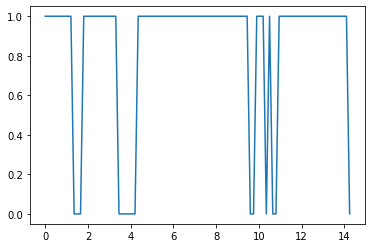

In [6]:
listing = os.listdir('testvideo')
for a in listing:
    vid = 'testvideo/'+a

#copy the video name in the next line and disable the first two lines to run the test code
#    vid = ''
    X_TEST = []
    frames = []
    count = 0    
    
    cap = cv2.VideoCapture(vid)
    ret,first_frame = cap.read()
    #print(ret)
    #plt.imshow(first_frame)
    first_frame = cv2.resize(first_frame, newDimension, interpolation = cv2.INTER_AREA)
    prev_gray = cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(first_frame)
    hsv[...,1] = 255
    
    frameRate = round(cap.get(5))
    num_frame = round(cap.get(7))
    #print(frameRate)
    #print(num_frame)
    
    newDimension = (img_row,img_col)
    sample_rate = 0.15 * frameRate 
    
    s = 0
    sample_frame = []
    sample_frame.append(0)
    while (s <= num_frame - 1 - img_depth * sample_rate):
        s += round(sample_rate) 
        sample_frame.append(s)
    
    #print(sample_frame)

    while (cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId in sample_frame:
            frame = cv2.resize(frame, newDimension, interpolation = cv2.INTER_AREA)
            gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag,ang = cv2.cartToPolar(flow[...,0],flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
            flow = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
            flow = cv2.cvtColor(flow,cv2.COLOR_BGR2GRAY)
            frames.append(flow)
            #plt.figure()
            #plt.imshow(flow)
            prev_gray = gray
            count +=1
            
    cap.release()
    cv2.destroyAllWindows()
    
    frames = np.array(frames)

    #print(frames.shape)
    
   
    
    for i in range(count-img_depth):
        frame_pack = []
        for j in range(img_depth):
            frame_pack.append(frames[i+j][:][:])    
        X_TEST.append(frame_pack)  
        
       #f = np.array(frame_pack)
       #print(f.shape)
    
    X_TEST = np.array(X_TEST)
    #print(X_TEST.shape)
    X_TEST = np.rollaxis(np.rollaxis(X_TEST,3,1),3,1)
    #print(X_TEST.shape)
    
    TEST_set = np.zeros((count-img_depth,img_row,img_col,img_depth,1))

    for sample in range(count-img_depth):
        TEST_set[sample,:,:,:,0] = X_TEST[sample,:,:,:]


        
    prediction = hist.predict(TEST_set)
    time = []
    prob = []
    time_label = []
    for i in range(count-img_depth):
        time.append(i*0.15)
        prob.append(prediction[i][0])
        time_label.append([i*0.15,prediction[i][0]])
    print(vid)
    plt.figure()
    plt.plot(time,prob)
    with open(a[0:4]+'_part8','w') as f:
        json.dump(str(time_label),f)